# Index analysis
- NDVI (Normalized Difference Vegetation Index)
	- 植生の健康状態や植生被覆率を把握できる
	- NDVI = (B8 - B4) / (B8 + B4)

- Narrow NDVI（Narrow Normalized Difference Vegetation Index）
	- NDVIと似ているが、B8Aを用いることでより特定の植生の状態を詳細に観測できる
	- Narrow NDVI = (B8A - B4) / (B8A + B4)

- EVI (Enhanced Vegetation Index)
	- 植生の鮮明度や健康状態をより強調して表示するために使用され、NDVIに比べて土壌の影響が少ない
	- EVI = 2.5 × (B8 - B4) / (B8 + 6 × B4 - 7.5 × B2 + 1)

- NDWI (Normalized Difference Water Index)
  - 植生の水分含有量を把握するために使用され、湿潤度の高い地域や農地を監視できる
  - NDWI = (B8 - B11) / (B8 - B11)

- SAVI (Soil Adjusted Vegetation Index)
  - 土壌の影響を調整し、植生が疎らな場所でも有効
  - SAVI = ((1 + L)(B8 - B4)) / (B8 + B4 + L)
  - Lは補正係数、通常0.5使用

- GNDVI (Green Normalized Difference Vegetation Index)
  - 植物のクロロフィル濃度に敏感で、特に農作物の健康状態の評価に利用できる
  - GNDVI = (B8 - B3) / (B8 + B3)

- MSI（Moisture Stress Index）
  - 植生の水分ストレス状態を評価できる
  - MSI = B11 / B8A

- VARI（Visible Atmospherically Resistant Index）
  - 可視域のバンドのみを使用し、大気の影響を受けにくくするために考案された植生インデックス。特に都市部や農地の植生の検出に役立つ
  - VARI = (B3 - B4) / (B3 + B4 - B2)
- GBNDVI（Green-Blue Normalized Difference Vegetation Index）
  - 可視域のGreenとBlueバンドを使用し、植生のクロロフィル含有量を反映するインデックスです。農作物の健康状態や植生の活力の評価に適している
  - GBNDVI = (B3 - B2) / (B3 + B2)

- RGBVI（Red-Green-Blue Vegetation Index）
  - RGBすべてのバンドを使用して、植生の状態を可視化するインデックスです。可視域のみで植物の健康状態を確認できる
  - RGBVI = (B4 × B3 - B2^2) / (B4 × B3 + B2^2)

- TGI（Triangular Greenness Index）
  - クロロフィル含有量を推定するために使われるインデックスで、農作物の成長段階の観測やストレス検出に利用される
  - TGI = B3 - 0.39 × B4 - 0.61 × B2

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.ndimage import zoom



In [ ]:
# numpyファイル生成していれば実行しなくてよい

# tif to numpy
def SaveImageAsNumpy(image_dir, output_dir, filename):
		img = Image.open(image_dir + filename + ".tif")
		img_array = np.array(img)
		np.save(output_dir + filename + ".npy", img_array)

image_dir = "../img/"
output_dir = "../data/"
filelist =glob.glob(image_dir + "*.tif")
for filename in filelist:
	SaveImageAsNumpy(image_dir, output_dir, filename.replace(".tif", "").replace(image_dir, ""))

/home/saiga/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [3]:
# read numpy
data_dir = "../data/"
B2 = np.load(data_dir + "T21JUL_20240719T135701_B02_10m.npy").astype(np.float32)
B3 = np.load(data_dir + "T21JUL_20240719T135701_B03_10m.npy").astype(np.float32)
B4 = np.load(data_dir + "T21JUL_20240719T135701_B04_10m.npy").astype(np.float32)
B8 = np.load(data_dir + "T21JUL_20240719T135701_B08_10m.npy").astype(np.float32)
B8A = np.load(data_dir + "T21JUL_20240719T135701_B8A_20m.npy").astype(np.float32)
B11 = np.load(data_dir + "T21JUL_20240719T135701_B11_20m.npy").astype(np.float32)
TCI = np.load(data_dir + "T21JUL_20240719T135701_TCI_10m.npy").astype(np.float32)

# ファイルサイズを合わせる
B8A = zoom(B8A, (2.0, 2.0), order=0)  # order=0 は最近傍補間
B11 = zoom(B11, (2.0, 2.0), order=0)  # order=0 は最近傍補間


In [4]:
# 正規化
def normalize(array):
		array_min, array_max = array[0].min(), array[0].max()
		return (array - array_min) / (array_max - array_min)

/tmp/ipykernel_1142/463634252.py:3: RuntimeWarning: invalid value encountered in divide
  NDVI = (B8 - B4) / (B8 + B4)


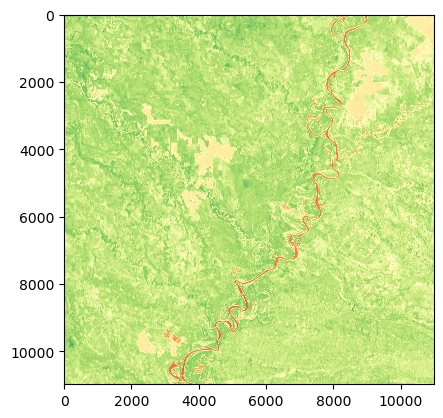

In [ ]:
# NDVI = (B8 - B4) / (B8 + B4)
epsilon = 1e-10
NDVI = (B8 - B4) / (B8 + B4 + epsilon)
NDVI = normalize(NDVI)  # 正規化

# plot
plt.figure()
plt.imshow(NDVI, cmap='RdYlGn')

Text(0.5, 1.0, 'Narrow NDVI')

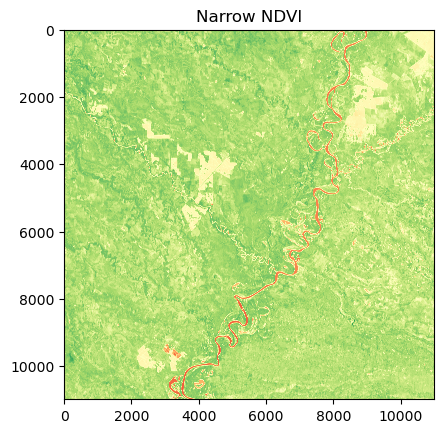

In [7]:
# Narrow NDVI = (B8A - B4) / (B8A + B4)
Narrow_NDVI = (B8A - B4) / (B8A + B4 + epsilon)
Narrow_NDVI = normalize(Narrow_NDVI)  # 正規化
# plot
plt.figure()
plt.imshow(Narrow_NDVI, cmap='RdYlGn')
plt.title("Narrow NDVI")



Text(0.5, 1.0, 'histogram')

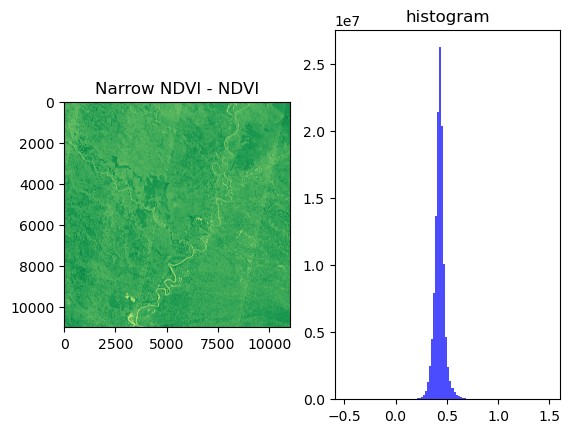

In [10]:
# 比較用
com = normalize(Narrow_NDVI - NDVI)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(com, cmap='RdYlGn', vmin=0, vmax=0.5)
plt.title("Narrow NDVI - NDVI")
plt.subplot(1, 2, 2)
plt.hist(com.ravel(), bins=100, color='blue', alpha=0.7)
plt.title("histogram")

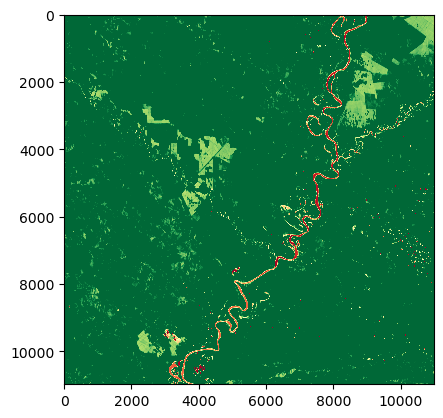

In [ ]:
# EVI = 2.5 × (B8 - B4) / (B8 + 6 × B4 - 7.5 × B2 + 1)
epsilon = 1e-10
EVI = 2.5 * (B8 - B4) / (B8 + 6 * B4 - 7.5 * B2 + 1 + epsilon)
# EVI = normalize(EVI)  # 正規化

# plot
plt.figure()
plt.imshow(EVI, cmap='RdYlGn', vmin=-1.0, vmax=1.0)

/tmp/ipykernel_3392/882762678.py:2: RuntimeWarning: invalid value encountered in divide
  NDWI = (B8 - B11) / (B8 + B11)


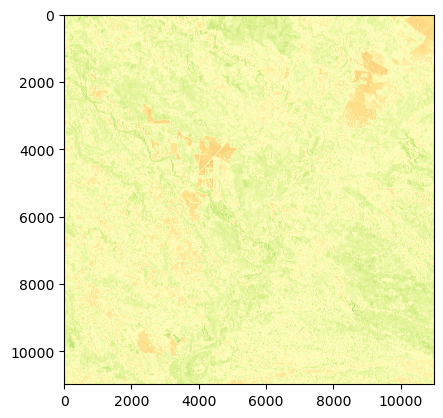

In [32]:
# NDWI = (B8 - B11) / (B8 - B11)
NDWI = (B8 - B11) / (B8 + B11)
# plot
plt.figure()
plt.imshow(NDWI, cmap='RdYlGn', vmin=-1, vmax=1)

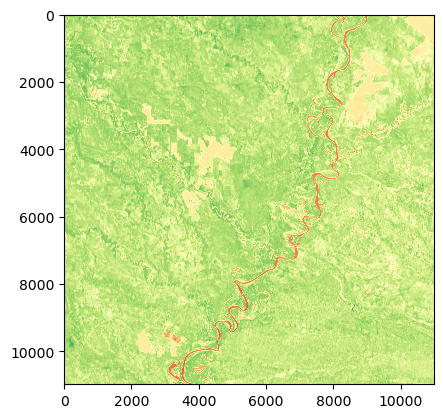

In [6]:
# SAVI = ((1 + L)(B8 - B4)) / (B8 + B4 + L)
L = 0.5
SAVI = ((B8 - B4) * (1 + L)) / (B8 + B4 + L)
# plot
plt.figure()
plt.imshow(SAVI, cmap='RdYlGn')

/tmp/ipykernel_1125/1188590204.py:2: RuntimeWarning: invalid value encountered in divide
  GNDVI = (B8 - B3) / (B8 + B3)


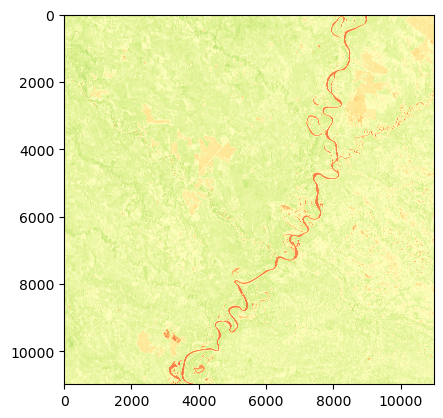

In [13]:
# GNDVI = (B8 - B3) / (B8 + B3)
GNDVI = (B8 - B3) / (B8 + B3)
# plot
plt.figure()
plt.imshow(GNDVI, cmap='RdYlGn')

/tmp/ipykernel_1125/3851852903.py:2: RuntimeWarning: invalid value encountered in divide
  MSI = B11 / B8A


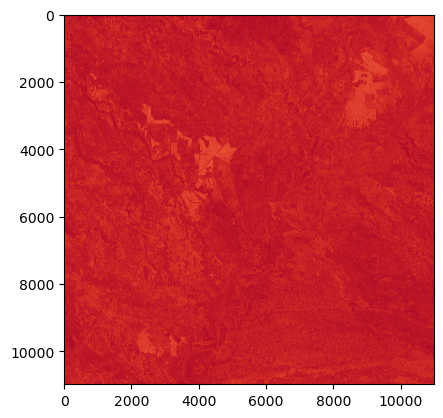

In [14]:
# MSI = B11 / B8A
MSI = B11 / B8A
# plot
plt.figure()
plt.imshow(MSI, cmap='RdYlGn')

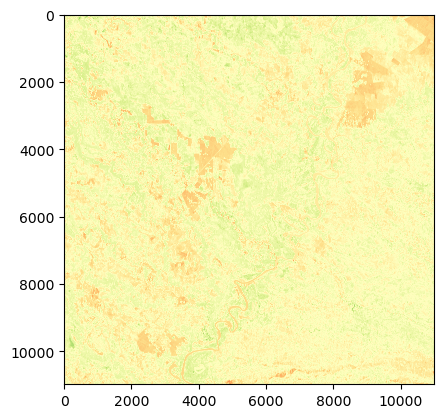

In [ ]:
# VARI = (B3 - B4) / (B3 + B4 - B2)
epsilon = 1e-10
VARI = (B3 - B4) / (B3 + B4 - B2 + epsilon)
# plot
plt.figure()
plt.imshow(VARI, cmap='RdYlGn',vmin=-1.0, vmax=1.0)

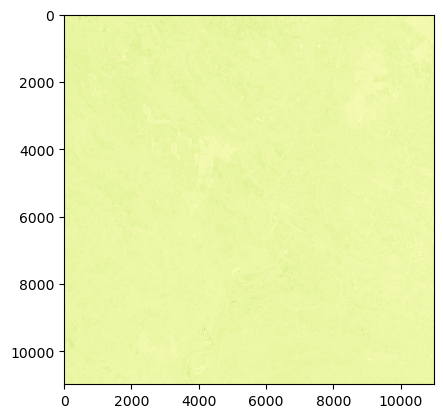

In [24]:
# GBNDVI = (B3 - B2) / (B3 - B2)
epsilon = 1e-10
GBNDVI = (B3 - B2) / (B3 + B2 + epsilon)
# plot
plt.figure()
plt.imshow(GBNDVI, cmap='RdYlGn', vmin=np.min(GBNDVI)*0.8, vmax=np.max(GBNDVI)*0.8)

/tmp/ipykernel_1125/624565992.py:2: RuntimeWarning: invalid value encountered in divide
  RGBVI = (B4 * B3 - B2 * B2) / (B4 * B3 + B2 * B2)


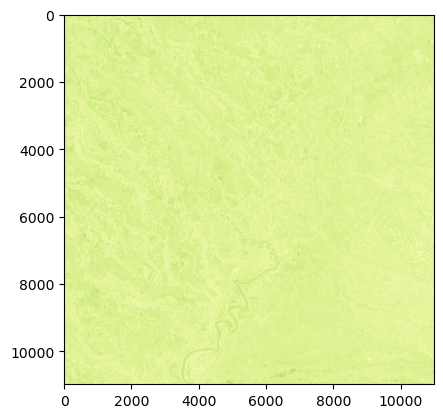

In [17]:
# RGBVI = (B4 × B3 - B2^2) / (B4 × B3 + B2^2)
RGBVI = (B4 * B3 - B2 * B2) / (B4 * B3 + B2 * B2)
# plot
plt.figure()
plt.imshow(RGBVI, cmap='RdYlGn')

[[1298. 1336. 1366. ... 1476. 1425. 1447.]
 [1306. 1308. 1328. ... 1524. 1433. 1393.]
 [1298. 1274. 1303. ... 1612. 1546. 1480.]
 ...
 [1340. 1364. 1378. ... 1204. 1228. 1214.]
 [1364. 1409. 1370. ... 1219. 1216. 1208.]
 [1385. 1374. 1366. ... 1233. 1224. 1192.]]
B2 max: 19568.0  min: 0.0
B3 max: 14552.0  min: 0.0
B4 max: 15288.0  min: 0.0
B8 max: 14744.0  min: 0.0
max: 5573.54  min: -11003.66


Text(0.5, 1.0, 'histogram')

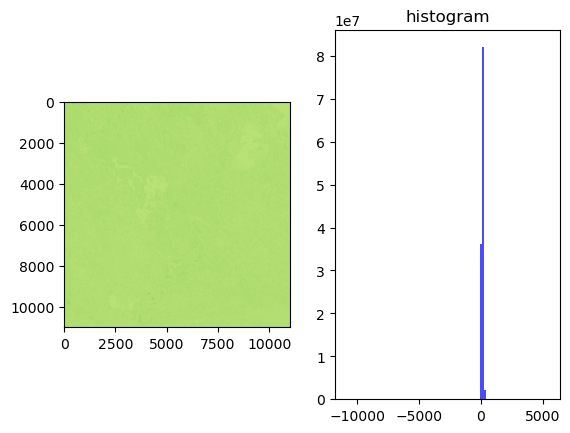

In [20]:
# TGI = B3 - 0.39 × B4 - 0.61 × B2
TGI = B3 - 0.39 * B4 - 0.61 * B2
print(B2)
print('B2 max:', np.max(B2), ' min:', np.min(B2))
print('B3 max:', np.max(B3), ' min:', np.min(B3))
print('B4 max:', np.max(B4), ' min:', np.min(B3))
print('B8 max:', np.max(B8), ' min:', np.min(B8))
print('max:', np.max(TGI), ' min:', np.min(TGI))
# plot
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(TGI, cmap='RdYlGn', vmin=np.min(TGI)*0.5, vmax=np.max(TGI)*0.5)
plt.subplot(1, 2, 2)
plt.hist(TGI.ravel(), bins=100, color='blue', alpha=0.7)
plt.title("histogram")